In [13]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time

In [23]:
#loading the Data.
X_train, y_train, X_test, y_test = lstm.load_data('sp500_5_features.csv', 50, True)


ValueError: could not convert string to float: '2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000,'

In [19]:
#building Model
model = Sequential()

model.add(LSTM(input_dim=1,
               output_dim=50,
               return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
            output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')

print('compilation time:', time.time() - start)

compilation time: 0.03061389923095703


In [20]:
#Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 3522 samples, validate on 186 samples
Epoch 1/1
3522/3522 [==============================] - 7s - loss: 0.0024 - val_loss: 6.0171e-04


In [21]:
print(lstm.plot_results_multiple)

<function plot_results_multiple at 0x113f64598>


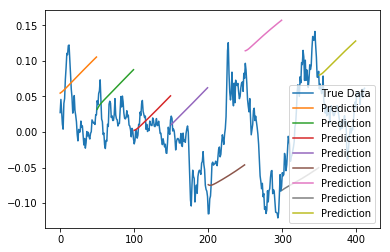

In [22]:
#plot results
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)